In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import RidgeCV, Lasso, LinearRegression, ElasticNet 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [2]:
#import Data
Data = pd.read_csv('/home/vidhikatkoria/Downloads/fliprhackathon6_0machinelearningtask/Train_dataset.csv',thousands=',')
Data.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [3]:
#remove the duplicates
Data.drop_duplicates(inplace=True)

In [4]:
#check if any null or nan values are present
Data.isnull().any()

City                 False
State                False
Type                 False
Population [2011]     True
Popuation [2001]      True
Sex Ratio             True
Median Age            True
Avg Temp              True
SWM                   True
Toilets Avl           True
Water Purity          True
H Index               True
Female Population     True
# of hospitals        True
Foreign Visitors      True
Covid Cases          False
dtype: bool

In [5]:
Data.isnull().sum() * 100 / len(Data)  #calculate the percentage of missing data in each column

City                  0.000000
State                 0.000000
Type                  0.000000
Population [2011]     6.099111
Popuation [2001]     62.515883
Sex Ratio             1.270648
Median Age            2.287166
Avg Temp              2.160102
SWM                   0.508259
Toilets Avl           3.303685
Water Purity         20.076239
H Index              17.789072
Female Population    17.916137
# of hospitals        1.905972
Foreign Visitors     11.435832
Covid Cases           0.000000
dtype: float64

In [6]:

#fill null or nan values with mode value in each column
def fill_na_mode():
    Data['Sex Ratio'].fillna(value=Data['Sex Ratio'].mode()[0],inplace=True )
    Data['Median Age'].fillna(value=Data['Median Age'].mode()[0],inplace=True )

    Data['Avg Temp'].fillna(value=Data['Avg Temp'].mode()[0],inplace=True )
    Data['SWM'].fillna(value=Data['SWM'].mode()[0],inplace=True )

    Data['Toilets Avl'].fillna(value=Data['Toilets Avl'].mode()[0],inplace=True )
    Data['Water Purity'].fillna(value=Data['Water Purity'].mode()[0],inplace=True )

    Data['H Index'].fillna(value=Data['H Index'].mode()[0],inplace=True )
    Data['Female Population'].fillna(value=Data['Female Population'].mode()[0],inplace=True )

    Data['# of hospitals'].fillna(value=Data['# of hospitals'].mode()[0],inplace=True )
    Data['Foreign Visitors'].fillna(value=Data['Foreign Visitors'].mode()[0],inplace=True )
    Data['Population [2011]'].fillna(value=Data['Population [2011]'].mode()[0],inplace=True )
    Data['Popuation [2001]'].fillna(value=Data['Popuation [2001]'].mode()[0],inplace=True )

In [7]:
#fill null or nan values with mean value in each column
def fill_na_mean():
    Data['Sex Ratio'].fillna(value=Data['Sex Ratio'].mean(),inplace=True )
    Data['Median Age'].fillna(value=Data['Median Age'].mean(),inplace=True )

    Data['Avg Temp'].fillna(value=Data['Avg Temp'].mean(),inplace=True )
    Data['SWM'].fillna(value=Data['SWM'].mode()[0],inplace=True )

    Data['Toilets Avl'].fillna(value=Data['Toilets Avl'].mean(),inplace=True )
    Data['Water Purity'].fillna(value=Data['Water Purity'].mean(),inplace=True )

    Data['H Index'].fillna(value=Data['H Index'].mean(),inplace=True )
    Data['Female Population'].fillna(value=Data['Female Population'].mean(),inplace=True )

    Data['# of hospitals'].fillna(value=Data['# of hospitals'].mean(),inplace=True )
    Data['Foreign Visitors'].fillna(value=Data['Foreign Visitors'].mean(),inplace=True )
    Data['Population [2011]'].fillna(value=Data['Population [2011]'].mean(),inplace=True )
    Data['Popuation [2001]'].fillna(value=Data['Popuation [2001]'].mean(),inplace=True )

In [8]:
#fill null or nan values with median value in each column
def fill_na_median():
    Data['Sex Ratio'].fillna(value=Data['Sex Ratio'].median(),inplace=True )
    Data['Median Age'].fillna(value=Data['Median Age'].median(),inplace=True )

    Data['Avg Temp'].fillna(value=Data['Avg Temp'].median(),inplace=True )
    Data['SWM'].fillna(value=Data['SWM'].mode()[0],inplace=True )

    Data['Toilets Avl'].fillna(value=Data['Toilets Avl'].median(),inplace=True )
    Data['Water Purity'].fillna(value=Data['Water Purity'].median(),inplace=True )

    Data['H Index'].fillna(value=Data['H Index'].median(),inplace=True )
    Data['Female Population'].fillna(value=Data['Female Population'].median(),inplace=True )

    Data['# of hospitals'].fillna(value=Data['# of hospitals'].median(),inplace=True )
    Data['Foreign Visitors'].fillna(value=Data['Foreign Visitors'].median(),inplace=True )
    Data['Population [2011]'].fillna(value=Data['Population [2011]'].median(),inplace=True )
    Data['Popuation [2001]'].fillna(value=Data['Popuation [2001]'].median(),inplace=True )

In [9]:
#fill null or nan values with mean value in each column after grouping values state wise
def fill_na_group_mean():
    Data['Sex Ratio'] = Data['Sex Ratio'].fillna(Data.groupby('State')['Sex Ratio'].transform('mean'))
    Data['Median Age'] = Data['Median Age'].fillna(Data.groupby('State')['Median Age'].transform('mean'))

    Data['Avg Temp'] = Data['Avg Temp'].fillna(Data.groupby('State')['Avg Temp'].transform('mean'))
    Data['SWM'].fillna(value=Data['SWM'].mode()[0],inplace=True )

    Data['Toilets Avl'] = Data['Toilets Avl'].fillna(Data.groupby('State')['Toilets Avl'].transform('mean'))
    Data['Water Purity'] = Data['Water Purity'].fillna(Data.groupby('State')['Water Purity'].transform('mean'))

    Data['H Index'] = Data['H Index'].fillna(Data.groupby('State')['H Index'].transform('mean'))
    Data['Female Population'] = Data['Female Population'].fillna(Data.groupby('State')['Female Population'].transform('mean'))

    Data['# of hospitals'] = Data['# of hospitals'].fillna(Data.groupby('State')['# of hospitals'].transform('mean'))
    Data['Foreign Visitors'] = Data['Foreign Visitors'].fillna(Data.groupby('State')['Foreign Visitors'].transform('mean'))

    Data['Population [2011]'] = Data['Population [2011]'].fillna(value=Data['Population [2011]'].mean(),inplace=True )
    Data['Popuation [2001]'] = Data['Popuation [2001]'].fillna(value=Data['Popuation [2001]'].mean(),inplace=True )

In [10]:
# fill_na_mode()   #use to fill null or nan values with mode value in each column
fill_na_mean()   #use to fill null or nan values with mean value in each column
# fill_na_median()  #use to fill null or nan values with median value in each column
# fill_na_group_mean()   #use to fill null or nan values with mean value in each column after grouping values state wise


In [11]:
Data.isnull().any()

City                 False
State                False
Type                 False
Population [2011]    False
Popuation [2001]     False
Sex Ratio            False
Median Age           False
Avg Temp             False
SWM                  False
Toilets Avl          False
Water Purity         False
H Index              False
Female Population    False
# of hospitals       False
Foreign Visitors     False
Covid Cases          False
dtype: bool

In [12]:
#encode city, state,type,SWM values using label encoder

le = LabelEncoder() 
  
Data['City']= le.fit_transform(Data['City']) 
Data['State']= le.fit_transform(Data['State']) 
Data['Type']= le.fit_transform(Data['Type']) 
Data['SWM']= le.fit_transform(Data['SWM']) 

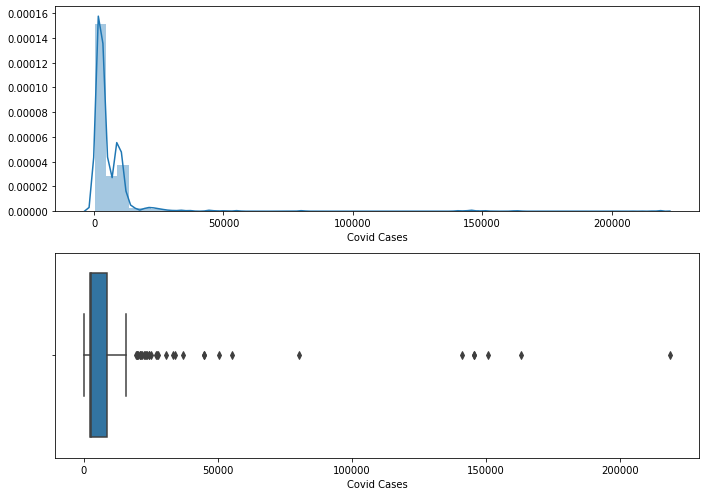

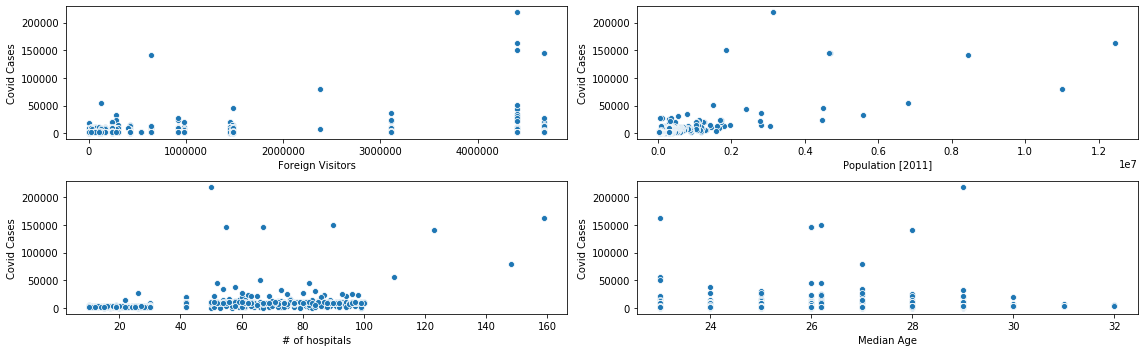

In [13]:
#visualizing covid cases
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['Covid Cases'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['Covid Cases'])
plt.tight_layout()

fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['Foreign Visitors'], Data['Covid Cases'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['Population [2011]'],Data['Covid Cases'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['# of hospitals'],Data['Covid Cases'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['Median Age'],Data['Covid Cases'])
plt.tight_layout()

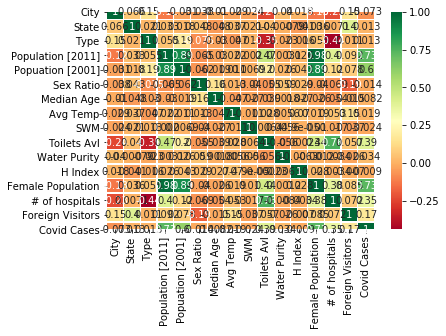

In [14]:
#It is time to look at a heatmap (using the library seaborn) to see the correlation among features
fig = sns.heatmap(Data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df_train.corr()-->correlation matrix


In [15]:
#drop Popuation [2001] as it is highly corelated with Population [2011]
#drop city, state columns as they are meant for location and are not meaningful as features
X = Data.drop(['City','State','Popuation [2001]','Covid Cases'],axis =1).values
y = Data['Covid Cases'].values

#splitting Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
#standardization scaler - fit&transform on train, fit only on test
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [17]:
# Multiple Liner Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, Data.drop(['City','State','Popuation [2001]','Covid Cases'],axis =1).columns, columns=['Coefficient']) 
coeff_df

6888.62618595824
[ 223.08303376 4721.44612827  616.17397407  431.06998521 -298.19326466
 -718.59949597  425.26621687  809.80138603 -360.39269261 5489.85805536
 1408.50406918 2218.2330385 ]


,Coefficient
Type,223.083034
Population [2011],4721.446128
Sex Ratio,616.173974
Median Age,431.069985
Avg Temp,-298.193265
SWM,-718.599496
Toilets Avl,425.266217
Water Purity,809.801386
H Index,-360.392693
Female Population,5489.858055


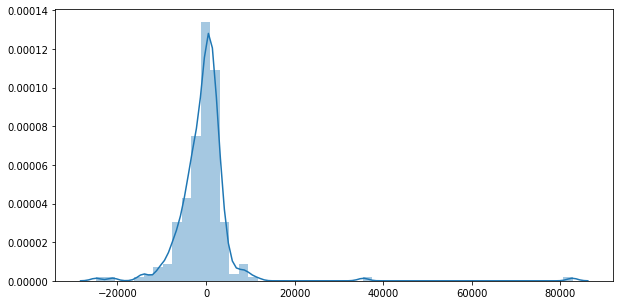

In [18]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [19]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,1974,471.383181
1,14726,15171.409692
2,1845,5836.975173
3,9361,7295.063985
4,9191,9052.383453
5,9923,6964.360865
6,2822,3263.373302
7,2247,1011.899384
8,9151,6420.021810
9,3734,9225.344006


In [20]:
# evaluate the performance of the multiple linear regression algorithm (MAE - MSE - RMSE)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
print('R2_score:',metrics.r2_score(y_test,y_pred))

MAE: 3429.5969582253447
MSE: 50383331.22014336
RMSE: 7098.121668451688
VarScore: 0.7057982804950126
R2_score: 0.7044609834942436


In [21]:
#Ridge regression
model = RidgeCV(cv=2)
model.fit(X_train, y_train)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=2)

In [22]:
# evaluate the performance of the ridge regression algorithm (MAE - MSE - RMSE)
predict = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict))  
print('MSE:', metrics.mean_squared_error(y_test, predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('VarScore:',metrics.explained_variance_score(y_test,predict))
print('R2_score:',metrics.r2_score(y_test,predict))

MAE: 3403.9080124191946
MSE: 50686642.533199064
RMSE: 7119.455213230789
VarScore: 0.7040612538893128
R2_score: 0.7026818171512346


In [23]:
#Lasso regression
model = Lasso()
model.fit(X_train, y_train)


Lasso()

In [24]:
# evaluate the performance of the lasso regression algorithm (MAE - MSE - RMSE)
predict = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict))  
print('MSE:', metrics.mean_squared_error(y_test, predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('VarScore:',metrics.explained_variance_score(y_test,predict))
print('R2_score:',metrics.r2_score(y_test,predict))

MAE: 3428.0104309284334
MSE: 50383037.27523299
RMSE: 7098.100962597883
VarScore: 0.7058029895746921
R2_score: 0.704462707719054


In [25]:
#Elastic regression
model = ElasticNet()
model.fit(X_train, y_train)


ElasticNet()

In [26]:
# evaluate the performance of the elasticnet regression algorithm (MAE - MSE - RMSE)
predict = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predict))  
print('MSE:', metrics.mean_squared_error(y_test, predict))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('VarScore:',metrics.explained_variance_score(y_test,predict))
print('R2_score:',metrics.r2_score(y_test,predict))

MAE: 3020.1704028527306
MSE: 59446674.135548085
RMSE: 7710.166933053271
VarScore: 0.6528601890429122
R2_score: 0.6512971416718467


In [27]:
#polynomial regression
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train,y_train)


Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [28]:
# evaluate the performance of the polynomial regression algorithm (MAE - MSE - RMSE)
poly_pred=pipe.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, poly_pred))  
print('MSE:', metrics.mean_squared_error(y_test, poly_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, poly_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,poly_pred))
print('R2_score:',metrics.r2_score(y_test,poly_pred))

MAE: 4331.240784953749
MSE: 126077019.01711844
RMSE: 11228.402335912195
VarScore: 0.26572281826890065
R2_score: 0.2604562401503171


In [29]:
#GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=500, max_depth = 15, min_samples_split = 30,
                                 learning_rate = 0.1, max_features=12, subsample = 0.94, 
                                 random_state=3, max_leaf_nodes=41)
gbr.fit(X_train,y_train)


GradientBoostingRegressor(max_depth=15, max_features=12, max_leaf_nodes=41,
                          min_samples_split=30, n_estimators=500,
                          random_state=3, subsample=0.94)

In [30]:
# evaluate the performance of the GradientBoostingRegressor algorithm (MAE - MSE - RMSE)
prediction = gbr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))  
print('MSE:', metrics.mean_squared_error(y_test, prediction))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('VarScore:',metrics.explained_variance_score(y_test,prediction))
print('R2_score:',metrics.r2_score(y_test,prediction))

MAE: 2310.4290646555155
MSE: 51082148.66148038
RMSE: 7147.177671044731
VarScore: 0.7013563167148229
R2_score: 0.7003618535969485


In [31]:
# Creating a Neural Network Model
# from tensorflow.keras.models import Sequential as tf_sequential
# from tensorflow.keras.layers import Dense as tf_Dense
# from tensorflow.keras.layers import Activation
from keras.optimizers import Adam,SGD
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

Using TensorFlow backend.


In [63]:
# having 13 neuron is based on the number of available features
model = Sequential()
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(1))

In [64]:
model.compile(optimizer='adam',loss='MSE')

In [65]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=1,epochs=100)
model.summary()

Train on 527 samples, validate on 260 samples
Epoch 1/100
527/527 [==============================] - 2s 4ms/step - loss: 264330688.7757 - val_loss: 144280565.9439
Epoch 2/100
527/527 [==============================] - 2s 3ms/step - loss: 212405816.0700 - val_loss: 120577562.1200
Epoch 3/100
527/527 [==============================] - 2s 3ms/step - loss: 175392706.3945 - val_loss: 96448474.5970
Epoch 4/100
527/527 [==============================] - 2s 3ms/step - loss: 152139619.9309 - val_loss: 77730220.8817
Epoch 5/100
527/527 [==============================] - 1s 3ms/step - loss: 142109498.6077 - val_loss: 60089448.6880
Epoch 6/100
527/527 [==============================] - 1s 2ms/step - loss: 126258018.9285 - val_loss: 59971570.7353
Epoch 7/100
527/527 [==============================] - 1s 3ms/step - loss: 130340263.7790 - val_loss: 42056300.4395
Epoch 8/100
527/527 [==============================] - 1s 3ms/step - loss: 115881113.7597 - val_loss: 42693162.3048
Epoch 9/100
527/527 [===

527/527 [==============================] - 1s 3ms/step - loss: 12000377.2537 - val_loss: 61077570.6362
Epoch 72/100
527/527 [==============================] - 1s 3ms/step - loss: 11826307.6193 - val_loss: 42197385.5739
Epoch 73/100
527/527 [==============================] - 1s 3ms/step - loss: 16112129.7447 - val_loss: 92716850.3988
Epoch 74/100
527/527 [==============================] - 2s 3ms/step - loss: 16715420.7805 - val_loss: 39416231.7006
Epoch 75/100
527/527 [==============================] - 2s 3ms/step - loss: 12709117.3427 - val_loss: 76932306.7669
Epoch 76/100
527/527 [==============================] - 2s 3ms/step - loss: 17877207.8394 - val_loss: 75362018.8081
Epoch 77/100
527/527 [==============================] - 1s 3ms/step - loss: 24605912.7730 - val_loss: 49370636.3620
Epoch 78/100
527/527 [==============================] - 1s 3ms/step - loss: 29361534.3081 - val_loss: 54875777.7695
Epoch 79/100
527/527 [==============================] - 2s 3ms/step - loss: 11828965.

MAE: 2966.5528794508714
MSE: 82872363.1034778
RMSE: 9103.425899268792
VarScore: 0.5302584040036129
R2_score: 0.5138865157586522


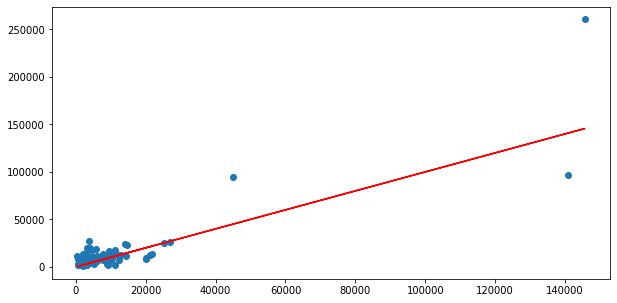

In [66]:
# evaluate the performance of the neural network model (MAE - MSE - RMSE)
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
print('R2_score:',metrics.r2_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [46]:
#grid of hyperparameters for model tuning

batch_size = [1]
epochs = [50,100,200]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam']
activation = ['softmax', 'relu', 'tanh', 'sigmoid']
param_grid = dict(batch_size=batch_size, epochs=epochs,  nb_epoch=epochs)#,optimizer=optimizer, activation=activation)


In [47]:
def create_nn_model(optimizer='SGD',activation='relu'):
    # having 13 neuron is based on the number of available features
    model = Sequential()
    model.add(Dense(13,activation=activation))
    model.add(Dense(13,activation=activation))
    model.add(Dense(13,activation=activation))
    model.add(Dense(13,activation=activation))
    model.add(Dense(13,activation=activation))
    model.add(Dense(13,activation=activation))
    model.add(Dense(13,activation=activation))
    model.add(Dense(13,activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer,loss='MSE')
    
    return model

In [48]:
#for hyperparameter tuning using grid search

def rmse_scorer(X,Y):                            #RMSE loss function
    return np.sqrt(metrics.mean_squared_error(X,Y))

scorers = {
        'MAE': make_scorer(metrics.mean_absolute_error),
        'MSE': make_scorer(metrics.mean_squared_error),
        'RMSE': make_scorer(rmse_scorer, greater_is_better=False),
        'Var_score': make_scorer(metrics.explained_variance_score)
        }

k_model = KerasClassifier(create_nn_model, verbose=0)
grid = GridSearchCV(k_model,param_grid,scoring=scorers,refit="MSE")
grid_result = grid.fit(X_train, y_train)#, X_val = X_test, y_val = y_test)relu

/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba

/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packag

/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packages/keras/wrappers/scikit_learn.py:232: RuntimeWarning: invalid value encountered in greater
  classes = (proba > 0.5).astype('int32')
/home/vidhikatkoria/anaconda3/lib/python3.7/site-packag

In [64]:
# summarize grid search results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 298649224.508539 using {'batch_size': 1, 'epochs': 50, 'nb_epoch': 50}


MAE: 5728.338461538461
MSE: 203293319.08461538
RMSE: 14258.096615068063
VarScore: 0.0


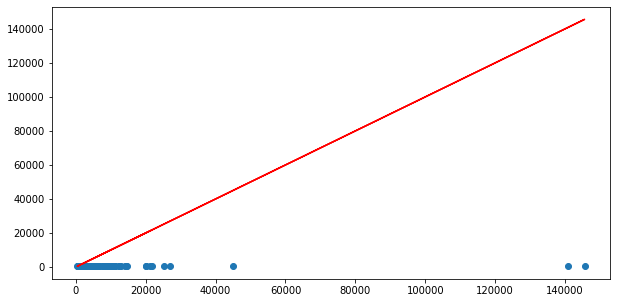

In [41]:
# evaluate the performance of the neural network model with tuned hyperparameters 
#(MAE - MSE - RMSE - Variance score - R2_score)
y_pred = grid_result.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
print('R2_score:',metrics.r2_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [116]:
# CNN model
def model_CNN_fit(X_train):
	model = Sequential()
	model.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
	model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(1))
	model.compile(loss='mse', optimizer='adam')
	return model

In [60]:
# fit a model
X_trains=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))  
model = model_CNN_fit(X_train)
model.fit(X_trains, y_train, epochs=100, batch_size=1)

Epoch 1/100
527/527 [==============================] - 3s 5ms/step - loss: 275746626.3745
Epoch 2/100
527/527 [==============================] - 2s 5ms/step - loss: 225462363.8582
Epoch 3/100
527/527 [==============================] - 3s 5ms/step - loss: 208137616.5439
Epoch 4/100
527/527 [==============================] - 3s 6ms/step - loss: 196978620.7584
Epoch 5/100
527/527 [==============================] - 3s 5ms/step - loss: 187130800.9296
Epoch 6/100
527/527 [==============================] - 2s 5ms/step - loss: 181848365.7537
Epoch 7/100
527/527 [==============================] - 3s 5ms/step - loss: 174739186.8176
Epoch 8/100
527/527 [==============================] - 2s 5ms/step - loss: 170942430.7176
Epoch 9/100
527/527 [==============================] - 2s 4ms/step - loss: 165686290.5187
Epoch 10/100
527/527 [==============================] - 2s 4ms/step - loss: 160983333.5990
Epoch 11/100
527/527 [==============================] - 3s 5ms/step - loss: 158622792.3700
Epoch 12

527/527 [==============================] - 2s 4ms/step - loss: 109289169.1331
Epoch 92/100
527/527 [==============================] - 2s 4ms/step - loss: 112433908.6590
Epoch 93/100
527/527 [==============================] - 2s 5ms/step - loss: 106006007.3766
Epoch 94/100
527/527 [==============================] - 2s 4ms/step - loss: 108796159.4063
Epoch 95/100
527/527 [==============================] - 2s 5ms/step - loss: 109955061.4397
Epoch 96/100
527/527 [==============================] - 2s 5ms/step - loss: 107395629.7540
Epoch 97/100
527/527 [==============================] - 2s 4ms/step - loss: 109372373.8160
Epoch 98/100
527/527 [==============================] - 2s 5ms/step - loss: 107118756.2757
Epoch 99/100
527/527 [==============================] - 3s 6ms/step - loss: 107807000.4484
Epoch 100/100
527/527 [==============================] - 2s 4ms/step - loss: 106769679.3781


MAE: 3443.021234864455
MSE: 42869313.61091803
RMSE: 6547.466197768265
VarScore: 0.7497496035253319
R2_score: 0.7485367784140831


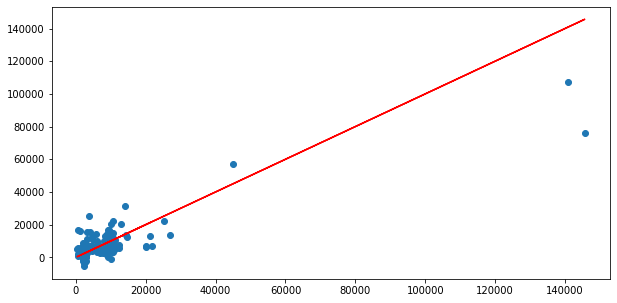

In [61]:
# evaluate the performance of the CNN model with tuned hyperparameters 
#(MAE - MSE - RMSE - Variance score - R2_score)

X_tests=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))  
y_pred = model.predict(X_tests)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
print('R2_score:',metrics.r2_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [128]:
#import Data
Data_test = pd.read_csv('/home/vidhikatkoria/Downloads/fliprhackathon6_0machinelearningtask/Test_dataset.csv',thousands=',')
Data_test.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0


In [129]:
#remove the duplicates
Data_test.drop_duplicates(inplace=True)

In [130]:
#fill null or nan values with mean value in each column
def fill_na_mean():
    Data_test['Sex Ratio'].fillna(value=Data_test['Sex Ratio'].mean(),inplace=True )
    Data_test['Median Age'].fillna(value=Data_test['Median Age'].mean(),inplace=True )

    Data_test['Avg Temp'].fillna(value=Data_test['Avg Temp'].mean(),inplace=True )
    Data_test['SWM'].fillna(value=Data_test['SWM'].mode()[0],inplace=True )

    Data_test['Toilets Avl'].fillna(value=Data_test['Toilets Avl'].mean(),inplace=True )
    Data_test['Water Purity'].fillna(value=Data_test['Water Purity'].mean(),inplace=True )

    Data_test['H Index'].fillna(value=Data_test['H Index'].mean(),inplace=True )
    Data_test['Female Population'].fillna(value=Data_test['Female Population'].mean(),inplace=True )

    Data_test['# of hospitals'].fillna(value=Data_test['# of hospitals'].mean(),inplace=True )
    Data_test['Foreign Visitors'].fillna(value=Data_test['Foreign Visitors'].mean(),inplace=True )
    Data_test['Population [2011]'].fillna(value=Data_test['Population [2011]'].mean(),inplace=True )
    Data_test['Popuation [2001]'].fillna(value=Data_test['Popuation [2001]'].mean(),inplace=True )

In [131]:
fill_na_mean()

In [132]:
Data_test['Type'] = Data_test['Type'].astype(str)
# Data_test['Type']= Data_test['Type'].str.replace('.','_')
Data_test

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,36774.000000,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,36754.000000,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,36732.000000,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,M.Cl,36706.000000,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.000000,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Nandaprayag,Uttarakhand,N.P,1641.000000,NaN,848.0,27.0,7.0,MEDIUM,12.0,181.0,0.316926,1392.0,4.0,105882.0
497,Kirtinagar,Uttarakhand,N.P,1517.000000,NaN,852.0,28.0,12.0,HIGH,16.0,198.0,0.336852,1292.0,6.0,105882.0
498,Kedarnath,Uttarakhand,N.P,612.000000,NaN,853.0,24.0,9.0,LOW,19.0,189.0,0.723253,522.0,6.0,105882.0
499,Gangotri,Uttarakhand,N.P,110.000000,NaN,852.0,27.0,8.0,MEDIUM,18.0,170.0,0.421061,94.0,8.0,105882.0


In [111]:
#encode city, state,type,SWM values using label encoder

le = LabelEncoder() 
  
# Data_test['City']= le.fit_transform(Data_test['City']) 
Data_test['State']= le.fit_transform(Data_test['State']) 
Data_test['Type']= le.fit_transform(Data_test['Type']) 
Data_test['SWM']= le.fit_transform(Data_test['SWM']) 

In [112]:
X_test = Data_test.drop(['City','State','Popuation [2001]'],axis =1).values

In [114]:
#standardization scaler - fit&transform on train, fit only on test
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [118]:
# fit a model
X_trains=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))  
model = model_CNN_fit(X_trains)
model.fit(X_trains, y, epochs=100, batch_size=1)

Epoch 1/100
787/787 [==============================] - 3s 4ms/step - loss: 240957521.9345
Epoch 2/100
787/787 [==============================] - 3s 4ms/step - loss: 194068975.0114
Epoch 3/100
787/787 [==============================] - 3s 4ms/step - loss: 173849265.2934
Epoch 4/100
787/787 [==============================] - 3s 4ms/step - loss: 160580153.3252
Epoch 5/100
787/787 [==============================] - 3s 4ms/step - loss: 149523126.7773
Epoch 6/100
787/787 [==============================] - 3s 4ms/step - loss: 140464363.3938
Epoch 7/100
787/787 [==============================] - 3s 4ms/step - loss: 135272293.7507
Epoch 8/100
787/787 [==============================] - 3s 4ms/step - loss: 129966420.7484
Epoch 9/100
787/787 [==============================] - 3s 4ms/step - loss: 127444439.8775
Epoch 10/100
787/787 [==============================] - 3s 4ms/step - loss: 124284460.1570
Epoch 11/100
787/787 [==============================] - 3s 4ms/step - loss: 120851203.3513
Epoch 12

787/787 [==============================] - 3s 4ms/step - loss: 68943594.3910
Epoch 92/100
787/787 [==============================] - 3s 4ms/step - loss: 70484782.3969
Epoch 93/100
787/787 [==============================] - 3s 4ms/step - loss: 70837797.0400
Epoch 94/100
787/787 [==============================] - 3s 4ms/step - loss: 68765776.3676
Epoch 95/100
787/787 [==============================] - 3s 4ms/step - loss: 69409512.2422
Epoch 96/100
787/787 [==============================] - 3s 4ms/step - loss: 68850839.6461
Epoch 97/100
787/787 [==============================] - 3s 4ms/step - loss: 67233379.9130
Epoch 98/100
787/787 [==============================] - 3s 4ms/step - loss: 64948779.5137
Epoch 99/100
787/787 [==============================] - 3s 4ms/step - loss: 69583098.8130
Epoch 100/100
787/787 [==============================] - 3s 4ms/step - loss: 66044952.6125


In [119]:
X_tests=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))  
y_pred = model.predict(X_tests)

In [133]:
table = list(zip(Data_test['City'], y_pred))
prediction = pd.DataFrame(table,columns=['City','Covid cases'])

In [135]:
prediction['Covid cases'] = prediction['Covid cases'].astype(int)
prediction['Covid cases'] = prediction['Covid cases'].abs()
prediction

,City,Covid cases
0,Tuensang,4260
1,Lakshmeshwar,3437
2,Zira,2151
3,Yawal,1849
4,Thana Bhawan,1231
...,...,...
496,Nandaprayag,3618
497,Kirtinagar,4330
498,Kedarnath,3468
499,Gangotri,2127


In [136]:
prediction.to_csv('Solution1.csv') 